In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Data Model - Pizza Sales.xlsx')

In [5]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [6]:
df.shape

(48620, 12)

In [7]:
df.describe

<bound method NDFrame.describe of        order_details_id  order_id       pizza_id  quantity order_date  \
0                     1         1     hawaiian_m         1 2015-01-01   
1                     2         2  classic_dlx_m         1 2015-01-01   
2                     3         2  five_cheese_l         1 2015-01-01   
3                     4         2    ital_supr_l         1 2015-01-01   
4                     5         2     mexicana_m         1 2015-01-01   
...                 ...       ...            ...       ...        ...   
48615             48616     21348  ckn_alfredo_m         1 2015-12-31   
48616             48617     21348  four_cheese_l         1 2015-12-31   
48617             48618     21348   napolitana_s         1 2015-12-31   
48618             48619     21349     mexicana_l         1 2015-12-31   
48619             48620     21350      bbq_ckn_s         1 2015-12-31   

      order_time  unit_price  total_price pizza_size pizza_category  \
0       11:38:36  

In [18]:
df['pizza_name'].nunique()

32

In [11]:
df['pizza_name'].value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [5]:
total_revenue = df['total_price'].sum()
print('Anual revenue:', total_revenue, '€')
total_quantity = df['quantity'].sum()
print('Anual demand:', total_quantity)

Anual revenue: 817860.05 €
Anual demand: 49574


In [6]:
df['pizza_size'].value_counts(ascending=False)

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [19]:
df['pizza_ingredients'].value_counts(ascending=False)

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

In [8]:
word_counter = {} #dictionary anlegen

# Durch jede Zeile des DataFrames gehen
for i in range(len(df)): #range function gives a sequence of numbers (one number is the stop index) len() function gives the numbers of rows in the df
    zutaten_string = df.at[i, 'pizza_ingredients'] #label based lookup (i is row, ingredients is column)
    menge = df.at[i, 'quantity']                     # Menge in dieser Zeile durch i row und 'quantity' als column
    zutaten_liste = zutaten_string.split(', ')        # Zutaten als Liste (gesplittet per ", ")

    # Jede einzelne Zutat in der Liste zählen, gewichtet mit Menge
    for zutat in zutaten_liste:
        if zutat in word_counter:
            word_counter[zutat] += menge              # Wenn Zutat schon vorhanden → Menge addieren
        else:
            word_counter[zutat] = menge               # Wenn neue Zutat → neu anlegen mit Menge


zutaten_sorted = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

gesamtmenge = sum(word_counter.values())

print("Zutaten sortiert nach Gesamtmenge:")
for zutat, anzahl in zutaten_sorted:
    print(f"{zutat}: {anzahl}x")


Zutaten sortiert nach Gesamtmenge:
Garlic: 27913x
Tomatoes: 27052x
Red Onions: 19834x
Red Peppers: 16562x
Mozzarella Cheese: 10569x
Pepperoni: 10540x
Spinach: 10166x
Mushrooms: 9729x
Chicken: 8618x
Capocollo: 6692x
Green Olives: 6283x
Jalapeno Peppers: 5771x
Artichokes: 5759x
Green Peppers: 5317x
Feta Cheese: 4797x
Pineapple: 4793x
Bacon: 4367x
Cilantro: 3401x
Corn: 3401x
Chipotle Sauce: 3401x
Asiago Cheese: 3383x
Goat Cheese: 3362x
Fontina Cheese: 3331x
Kalamata Olives: 3304x
Pesto Sauce: 2924x
Zucchini: 2507x
Barbecued Chicken: 2432x
Barbecue Sauce: 2432x
Sliced Ham: 2422x
Thai Sweet Chilli Sauce: 2371x
Artichoke: 2370x
Gouda Cheese: 2370x
Coarse Sicilian Salami: 1938x
Luganega Sausage: 1938x
Onions: 1938x
Peperoncini verdi: 1924x
Italian Sausage: 1914x
Chorizo Sausage: 1914x
Sun-dried Tomatoes: 1904x
Ricotta Cheese: 1902x
Gorgonzola Piccante Cheese: 1902x
Parmigiano Reggiano Cheese: 1902x
Calabrese Salami: 1884x
Anchovies: 1464x
Prosciutto di San Daniele: 1457x
Arugula: 1457x
Genoa 

In [20]:
# Count unique pizza recipes that use garlic
total_pizza_recipes = df['pizza_name'].nunique()

garlic_pizzas = df[df['pizza_ingredients'].str.contains('garlic', case=False, na=False)]['pizza_name'].nunique()
print(f"Garlic is used in {garlic_pizzas} unique pizza recipes, which is {garlic_pizzas/total_pizza_recipes*100}%.")

tomatoes_pizzas = df[df['pizza_ingredients'].str.contains('tomatoes', case=False, na=False)]['pizza_name'].nunique()
print(f"Tomatoes is used in {tomatoes_pizzas} unique pizza recipes, which is {tomatoes_pizzas/total_pizza_recipes*100}%.")

redonions_pizzas = df[df['pizza_ingredients'].str.contains('Red Onions', case=False, na=False)]['pizza_name'].nunique()
print(f"Red Onions is used in {redonions_pizzas} unique pizza recipes, which is {redonions_pizzas/total_pizza_recipes*100}%.")


Garlic is used in 20 unique pizza recipes, which is 62.5%.
Tomatoes is used in 19 unique pizza recipes, which is 59.375%.
Red Onions is used in 13 unique pizza recipes, which is 40.625%.


In [21]:
df['order_date']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [11]:
df['order_time']

0        11:38:36
1        11:57:40
2        11:57:40
3        11:57:40
4        11:57:40
           ...   
48615    21:23:10
48616    21:23:10
48617    21:23:10
48618    22:09:54
48619    23:02:05
Name: order_time, Length: 48620, dtype: object

In [22]:
df['hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
hour_counts = df['hour'].value_counts().sort_index()
print(hour_counts)

hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


In [23]:
df['weekday'] = df['order_date'].dt.day_name()
weekday_counts = df['weekday'].value_counts(ascending=False).sort_index()
print(weekday_counts)

weekday
Friday       8106
Monday       6369
Saturday     7355
Sunday       5917
Thursday     7323
Tuesday      6753
Wednesday    6797
Name: count, dtype: int64


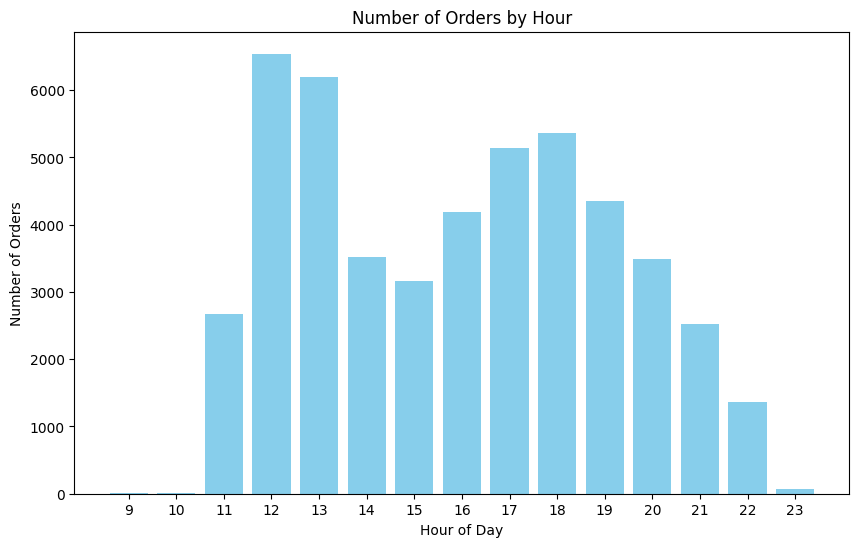

In [24]:
plt.figure(figsize=(10,6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.xticks(hour_counts.index)
plt.show()

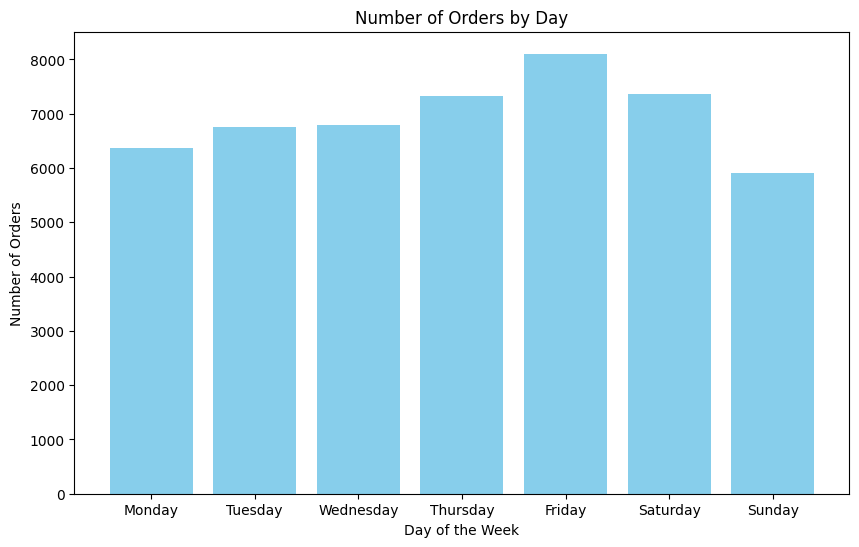

In [25]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekday_counts_ordered = weekday_counts.reindex(weekday_order)
plt.figure(figsize=(10,6))
plt.bar(weekday_counts_ordered.index, weekday_counts_ordered.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day')
plt.xticks(weekday_counts_ordered.index)
plt.show()

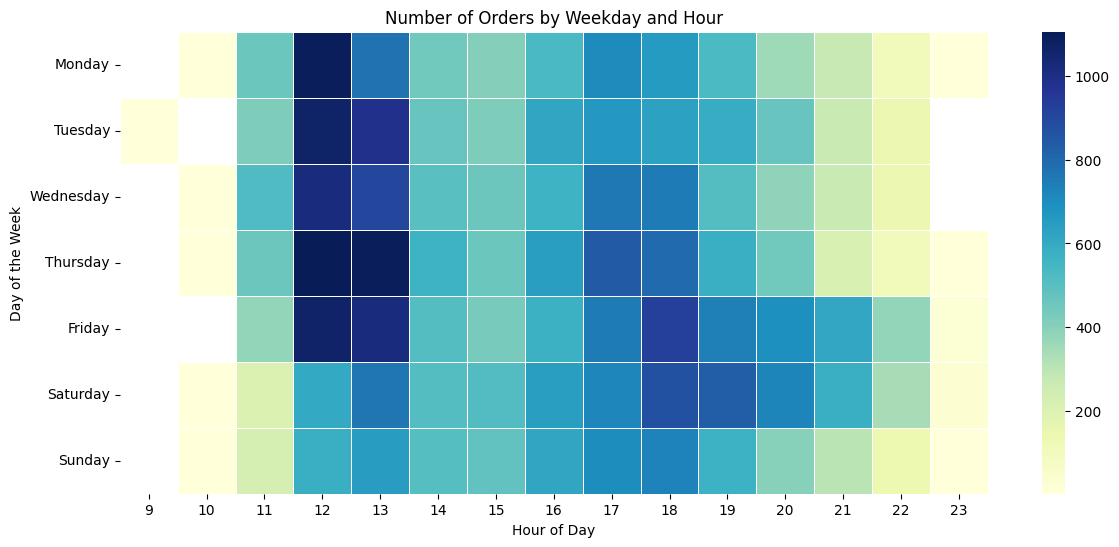

In [26]:
# Pivot table: rows=weekday, columns=hour, values=number of orders
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = df.pivot_table(index='weekday', columns='hour', values='pizza_name', aggfunc='count').reindex(weekday_order)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.7, annot=False, fmt='g')
plt.title('Number of Orders by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()